In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=  np.load("Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")['arr_0']
test=  np.load("Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")['arr_0']
train_labels = np.load("Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")['arr_0']
test_labels = np.load("Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")['arr_0']
digi_images = np.load("Kannada_MNIST_npz/Dig_MNIST/X_dig_MNIST.npz")['arr_0']
digi_labels = np.load("Kannada_MNIST_npz/Dig_MNIST/y_dig_MNIST.npz")['arr_0']

In [3]:
digi_images.shape

(10240, 28, 28)

In [4]:
train = train.reshape((60000, 28*28))
test = test.reshape((10000, 28*28))
digi_images = digi_images.reshape((10240, 28*28))

In [5]:
train.shape

(60000, 784)

In [6]:
standardized_train = StandardScaler().fit_transform(train)
standardized_test = StandardScaler().fit_transform(test)
standardized_digi_images = StandardScaler().fit_transform(digi_images)
print(standardized_train.shape)

(60000, 784)


In [7]:
standardized_train_subset = standardized_train[0:10000]
train_labels_subset = train_labels[0:10000]
standardized_test_subset = standardized_test[0:10000]
test_labels_subset = test_labels[0:10000]
standardized_digi_images_subset = standardized_digi_images[0:10000]
digi_labels_subset = digi_labels[0:10000]

In [8]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50_train = pca_50.fit_transform(standardized_train_subset)


tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(pca_result_50_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...
[t-SNE] Computed neighbors for 10000 samples in 7.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.139875
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.892624
[t-SNE] KL divergence after 300 iterations: 2.447828


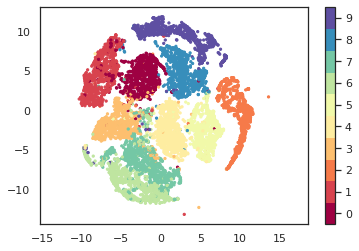

In [9]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=train_labels_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);
plt.savefig("train_data.png",dpi = 300, pad_inches=0.4)

In [10]:
pca_50 = PCA(n_components=50)
pca_result_50_test = pca_50.fit_transform(standardized_test_subset)


tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(pca_result_50_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 7.984s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.612527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.514908
[t-SNE] KL divergence after 300 iterations: 2.529977


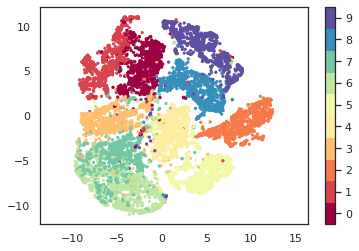

In [11]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=test_labels_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);
plt.savefig("test_data.png", dpi=300, pad_inches=0.4)

In [12]:
pca_50 = PCA(n_components=50)
pca_result_50_digi = pca_50.fit_transform(standardized_digi_images_subset)


tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(pca_result_50_digi)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 8.510s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.395446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.159164
[t-SNE] KL divergence after 300 iterations: 2.742720


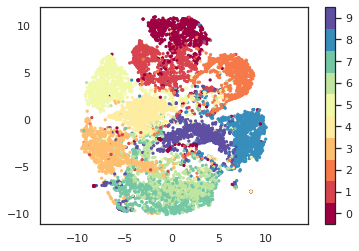

In [13]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=digi_labels_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);
plt.savefig("digi_data.png", dpi = 300, pad_inches=0.4)